# Part 2

## やること

1. State the different modeling approaches that you will compare to address the business opportunity.（ビジネスチャンスに対処するために比較するさまざまなモデリングアプローチを説明します。）
2. Iterate on your suite of possible models by modifying data transformations, pipeline architectures, hyperparameters and other relevant factors.（データ変換、パイプラインアーキテクチャ、ハイパーパラメータ、およびその他の関連する要素を変更することにより、可能なモデルのスイートを反復処理します。）
3. Re-train your model on all of the data using the selected approach and prepare it for deployment.（選択したアプローチを使用して、すべてのデータでモデルを再トレーニングし、展開の準備をします。）
4. Articulate your findings in a summary report.（要約レポートで調査結果を明確にします。）

## Our Story

The business opportunity has been defined and you have come to an agreement with leadership with respect to appropriate wording and testable hypotheses. This part of the case study will focus on the next two stages in the enterprise workflow, namely data transformations and models. This part of the workflow will be treated slightly differently than previous case studies as these are time-series data, but the general procedure and best practices remain the same. These materials will provide the necessary guidance so that you can apply one of the supervised learning approaches that we have already discussed. However, you will also be encouraged to explore some of the time-series modeling tools available.

### 和訳

ビジネスチャンスが定義され、適切な表現と検証可能な仮説に関してリーダーシップと合意に達しました。 ケーススタディのこの部分では、エンタープライズワークフローの次の2つの段階、つまりデータ変換とモデルに焦点を当てます。 ワークフローのこの部分は、時系列データであるため、以前のケーススタディとは少し異なる方法で処理されますが、一般的な手順とベストプラクティスは同じままです。 これらの資料は、すでに説明した教師あり学習アプローチの1つを適用できるように、必要なガイダンスを提供します。 ただし、利用可能な時系列モデリングツールのいくつかを調べることもお勧めします。

## Hands On 説明

Time-series data are commonly encountered in data science. In particular, the field of finance, signal processing, weather and other fields regularly deal with data formatted in this way. The goal of this case study is time-series forecasting, which can be thought of as the use of a model to predict future values based on previously observed values. So we could try to predict purchases, number of views or the feature most closely related to our business opportunity, revenue.

### 和訳

時系列データは、データサイエンスでよく見られます。 特に、金融、信号処理、気象などの分野では、このようにフォーマットされたデータを定期的に扱っています。 このケーススタディの目標は時系列予測です。これは、以前に観測された値に基づいて将来の値を予測するためのモデルの使用と考えることができます。 そのため、購入、視聴回数、またはビジネスチャンス、収益に最も密接に関連する機能を予測することができます。

## import packages

In [1]:
import sys
sys.path.append("../solution-guidance/")
import cslib
# import model

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## parameter settings

In [4]:
path_data = "../data/"
path_data_production = path_data + "cs-production/"
path_data_train = path_data + "cs-train/"

In [5]:
# 予測の対象とする国. 今回はuk
name_target_country = "united_kingdom"

## 問題と回答 

### 1.State the different modeling approaches that you will compare to address the business opportunity.（ビジネスチャンスに対処するために比較するさまざまなモデリングアプローチを説明します。）

#### 回答

- 時系列回帰
- ランダムフォレスト, 勾配ぶースティング
- ガウス過程

### 2.Iterate on your suite of possible models by modifying data transformations, pipeline architectures, hyperparameters and other relevant factors.（データ変換、パイプラインアーキテクチャ、ハイパーパラメータ、およびその他の関連する要素を変更することにより、可能なモデルのスイートを反復処理します。）

#### データ変換

In [6]:
# 時系列にしたDataFrameを国ごとの辞書にする
dct_df_train = cslib.fetch_ts(path_data_train)

... loading ts data from files


In [7]:
# 特徴量の作成
# 対象の日付は 2017/11/29 ~ 2019/5/31 （計549日）となる
df_features, y, dates = cslib.engineer_features(dct_df_train[name_target_country])

In [8]:
dct_df_train[name_target_country]

,date,purchases,unique_invoices,unique_streams,total_views,year_month,revenue
0,2017-11-01,0,0,0,0,2017-11,0.00
1,2017-11-02,0,0,0,0,2017-11,0.00
2,2017-11-03,0,0,0,0,2017-11,0.00
3,2017-11-04,0,0,0,0,2017-11,0.00
4,2017-11-05,0,0,0,0,2017-11,0.00
...,...,...,...,...,...,...,...
602,2019-06-26,1274,62,965,5702,2019-06,4611.00
603,2019-06-27,1487,72,897,8230,2019-06,5128.02
604,2019-06-28,923,62,565,4674,2019-06,3096.20
605,2019-06-29,0,0,0,0,2019-06,0.00


In [9]:
df_features

,previous_7,previous_14,previous_28,previous_70,previous_year,recent_invoices,recent_views
0,13281.12,13281.12,13281.12,13281.120,0.00,5.500000,461.500000
1,26504.09,26504.09,26504.09,26504.090,0.00,9.620690,916.275862
2,39445.59,39445.59,39445.59,39445.590,0.00,14.100000,1393.833333
3,48608.66,48608.66,48608.66,48608.660,0.00,17.433333,1782.233333
4,49871.94,49871.94,49871.94,49871.940,0.00,18.466667,1885.600000
...,...,...,...,...,...,...,...
544,27077.89,75420.91,164870.89,332139.731,214887.55,64.033333,5784.000000
545,21415.85,55184.21,164870.89,329400.071,217886.64,64.033333,5784.000000
546,18685.65,50822.41,141209.24,324094.101,224261.42,65.100000,5887.633333
547,20229.09,51554.17,143412.75,325326.831,225882.00,67.000000,6052.166667


In [10]:
# 2019/8~2019/11 のデータ
# 今回の分析ではテストデータとなる
dct_df_production = cslib.fetch_ts(path_data_production)
df_production = dct_df_production[name_target_country]

... loading ts data from files


#### prophet（時系列回帰）

In [ ]:
from fbprophet import Prophet

In [11]:
# 入力用のデータフレーム作成
df_input = pd.DataFrame()
df_input["ds"] = dates
df_input["y"] = y

In [12]:
# モデルの適用
model = Prophet(growth="linear", daily_seasonality=True)
model.add_seasonality(name="monthly", period=30, fourier_order=5)
model.fit(df_input)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


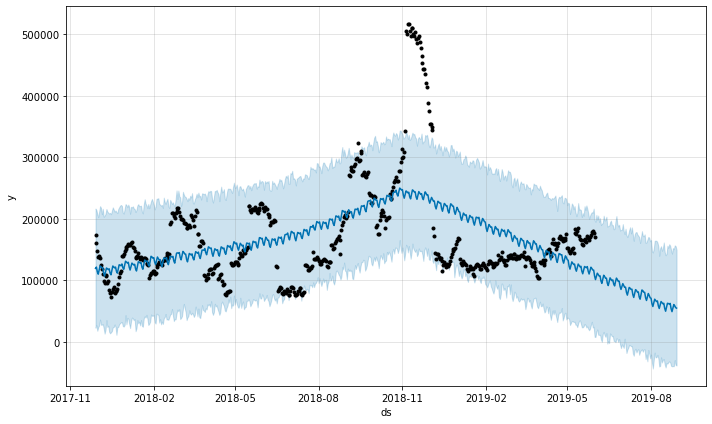

In [13]:
# 表示
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
model.plot(forecast)
plt.show()

#### tpot（ランダムフォレスト, 勾配ぶースティング）

In [14]:
from tpot import TPOTRegressor

C:\Users\EINOSUKEIIDA\Anaconda3\envs\stan_env\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [18]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(df_features, y)
tpot.export('tpot_pipeline.py')

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

#### GPy（ガウス過程）

In [ ]:
import gpy

### 3.Re-train your model on all of the data using the selected approach and prepare it for deployment.（選択したアプローチを使用して、すべてのデータでモデルを再トレーニングし、展開の準備をします。）

### 4.Articulate your findings in a summary report.（要約レポートで調査結果を明確にします。）